# The Indoor Agriculture Modeler's Lab

### <u>Table of contents:</u>

**1. How to use this notebook**<br/><br/>
**2. Background information**<br/>
&emsp;&emsp; 2.1. Understanding the Data from Roots & Culture farm<br/><br/>
**3. How we built a model of a real indoor hemp farm**<br/>
&emsp;&emsp; 3.1. Break down the problem<br/>
&emsp;&emsp; 3.2. Build a model map<br/>
&emsp;&emsp; 3.3. Describe how states evolve at each time step<br/>
&emsp;&emsp; 3.4. Build config and agent files<br/>
&emsp;&emsp; 3.5. Visualizing predictions and performing inference<br/><br/>
**4. Experiment: Changing the model**<br/>
&emsp;&emsp; 4.1. Envisioning the change<br/>
&emsp;&emsp; 4.2. Modifying the agent<br/>
&emsp;&emsp; 4.3. Visualizing impact on predictions<br/>

## 1. How to use this notebook

First, understand what it is: A tool for aspiring and current GaiaHub contributors who want to see an example of how the Digital Gaia engine can be used to model a real farm, and how to assess the impact of changes on that model.

In this notebook we will break down how we used the engine to build a simple and but powerful model of Roots & Culture's indoor hemp farm in Virginia.

Then, using this model of the Roots & Culture farm, we will illustrate how contributing a change to the model will change predications, and how to add **provenance** to model changes.

In general we we hope this notebook will help catalyze **Digital Gaia** contributors to feel confident:
* refining the plant growth model
* refining the soil health model
* refining the water and irrigation models
* improving the way data is ingested, as well as expanding the types of ingestible data
* improving models of management practices, fertilizers, pesticides, heribicides, and more

***If this is your first time here, consider starting with the [Get Started notebook](https://github.com/gaia-os/gaia-hub/blob/main/notebooks/get_started.ipynb).***

## 2. Background information
**Roots & Culture (RC)** is an indoor hemp farm in Virginia, USA where high CBD hemp flowers are grown, harvested, then processed into extract which is infused into skincare products. Since 2018, they have been growing indoors because it offers control over all aspects of the environment, ensuring plants experience only the most favourable conditions during development. The result is an extremely clean, high-value extract which is perfect for dermatological applications.

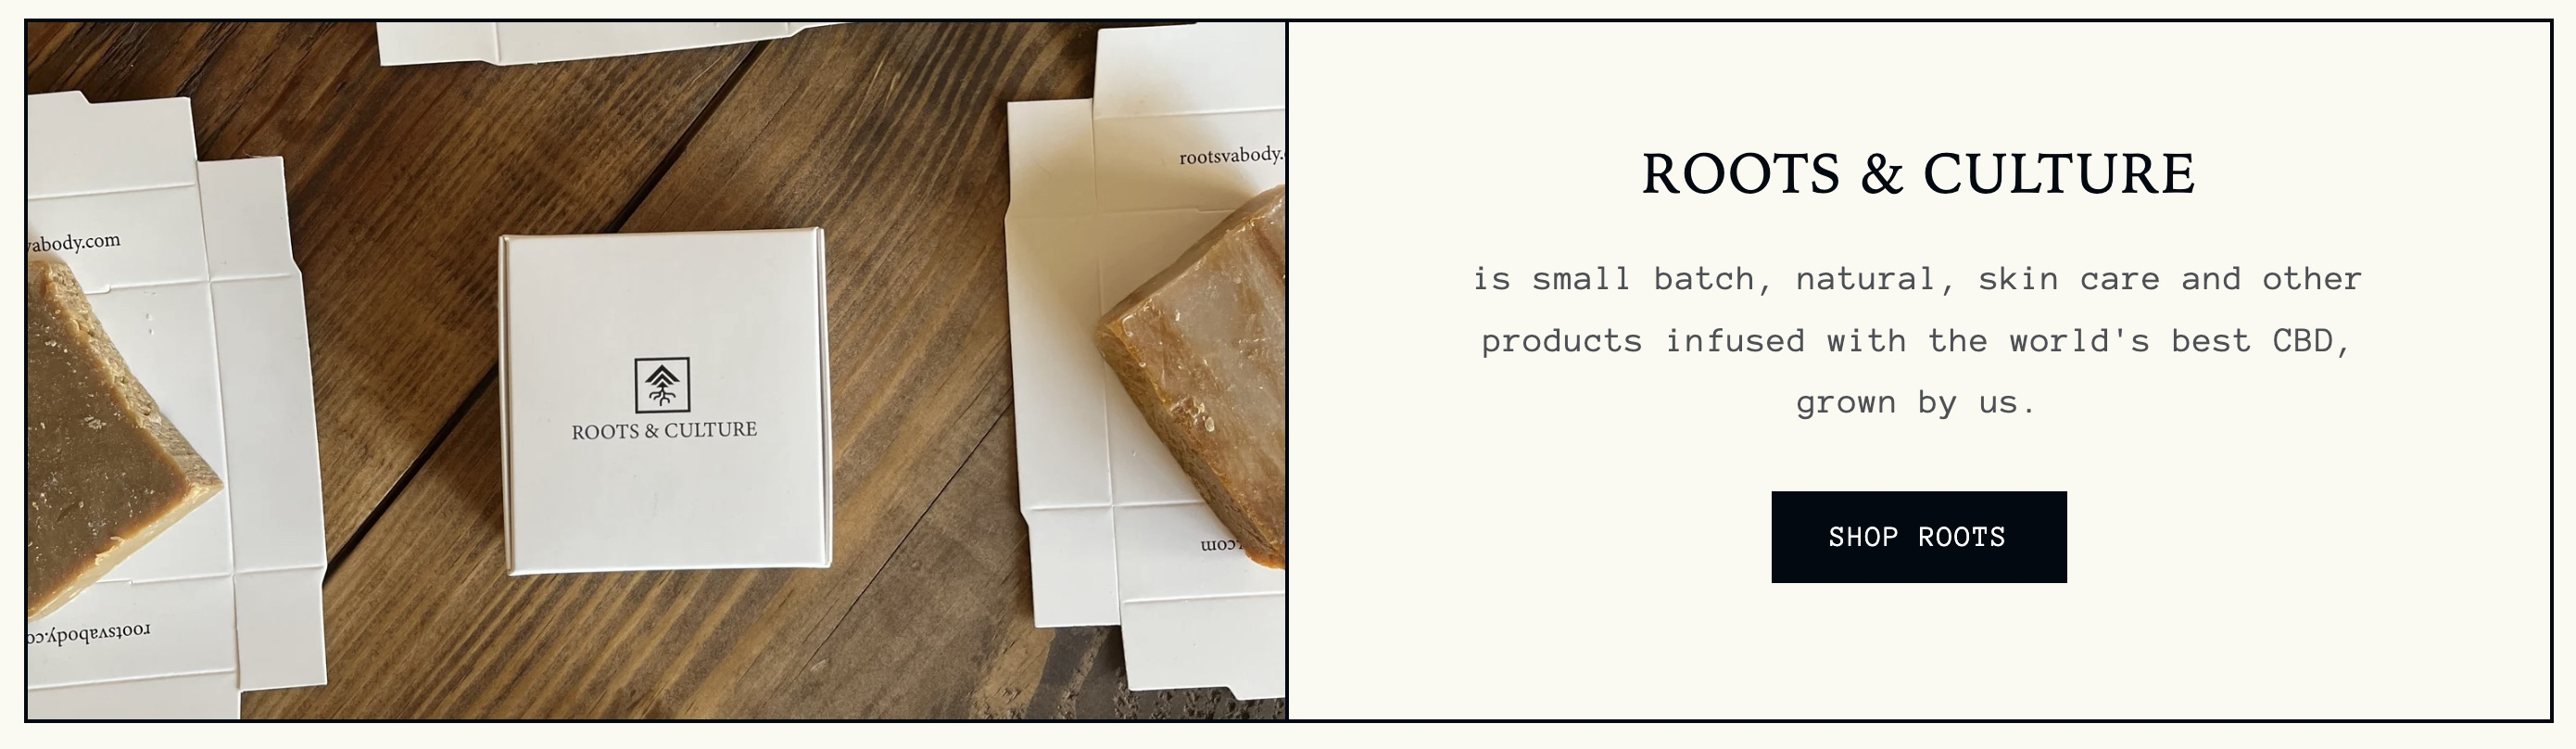

Unlike most indoor agriculturists who prefer hydroponics or similar approaches, **RC** grows in deep (50 cm) soil containers using an organic living "supersoil" blend imported from Oregon and inoculated with the same micro-organisms one would expect in a natural setting. This makes their indoor farm an ideal "semi-outdoor" conrolled testbed for demo-ing how our proposed model improvements perform.
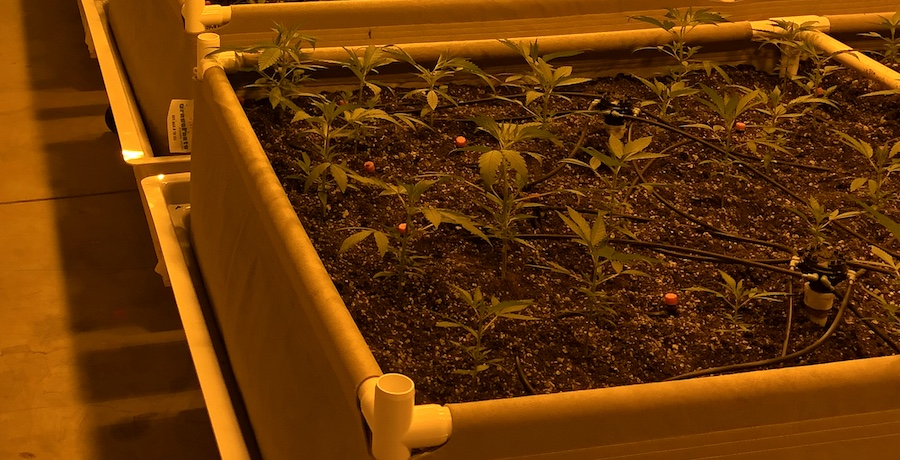

For all experiments in this notebook, you will use their Indoor Grow Room 1, aptly named `indoor1`. This indoor facility has 28 1kw High Pressure Sodium lights, 4 dehumidifiers, 2 humidifiers, a central air conditing unit, large fans for air circulation and a fully automated drip irrigation system.

 **Note**: the seedling stage of growth is not modeled here.
 
 Here is one of **RC**'s growers standing inside of Indoor Grow Room 1 just before harvesting oil rich flowers:
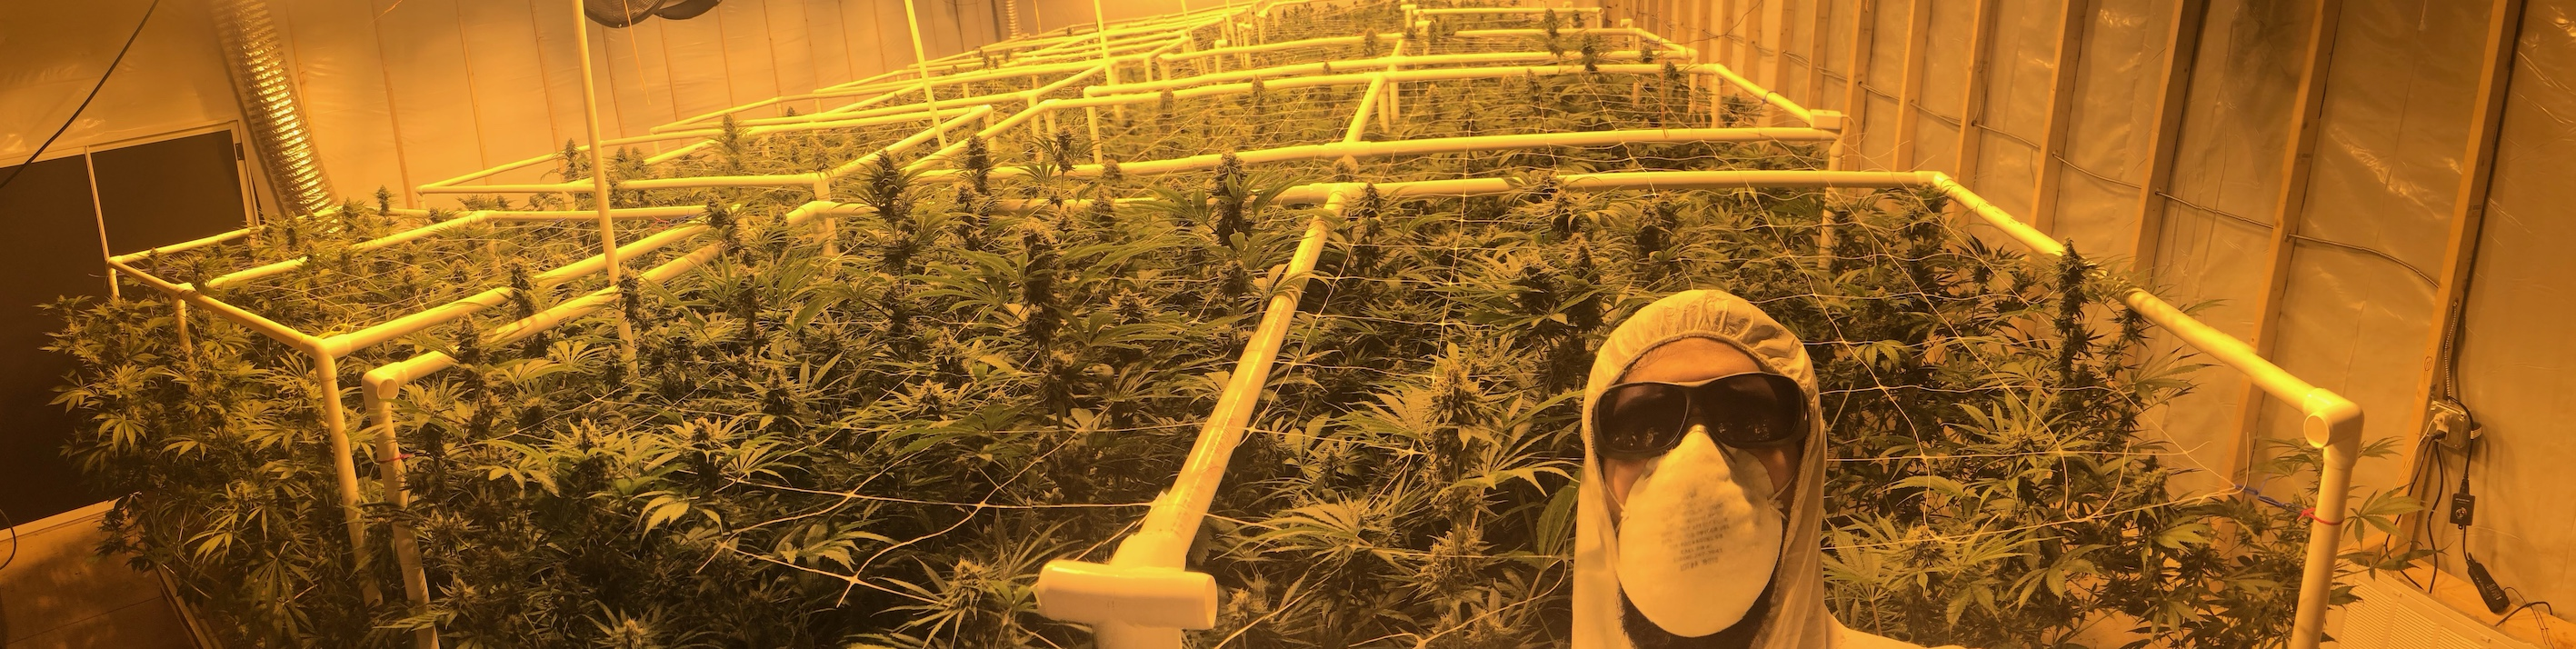

## 2.1 Understanding the Data from Roots & Culture

For years, **RC** have been collecting detailed environmental data (temperature, relative humidity, light and more) from [Pulse sensors](https://pulsegrow.com/products/pulse-one?variant=48139205901) in all their facilities. In addition to this data, they performed soil tests in all rooms before and after each grow, and have been collecting standard agronomic statistics (planting rate, harvest weights, etc.). 

The grow cycle we will use for model demos is a cycle that ran from June 24, 2019 to October 14, 2019 and is  preconfigured in the `roots-indoor1.json` configuration file.

**The environmental, agronomic and economic data available from this cycle**:

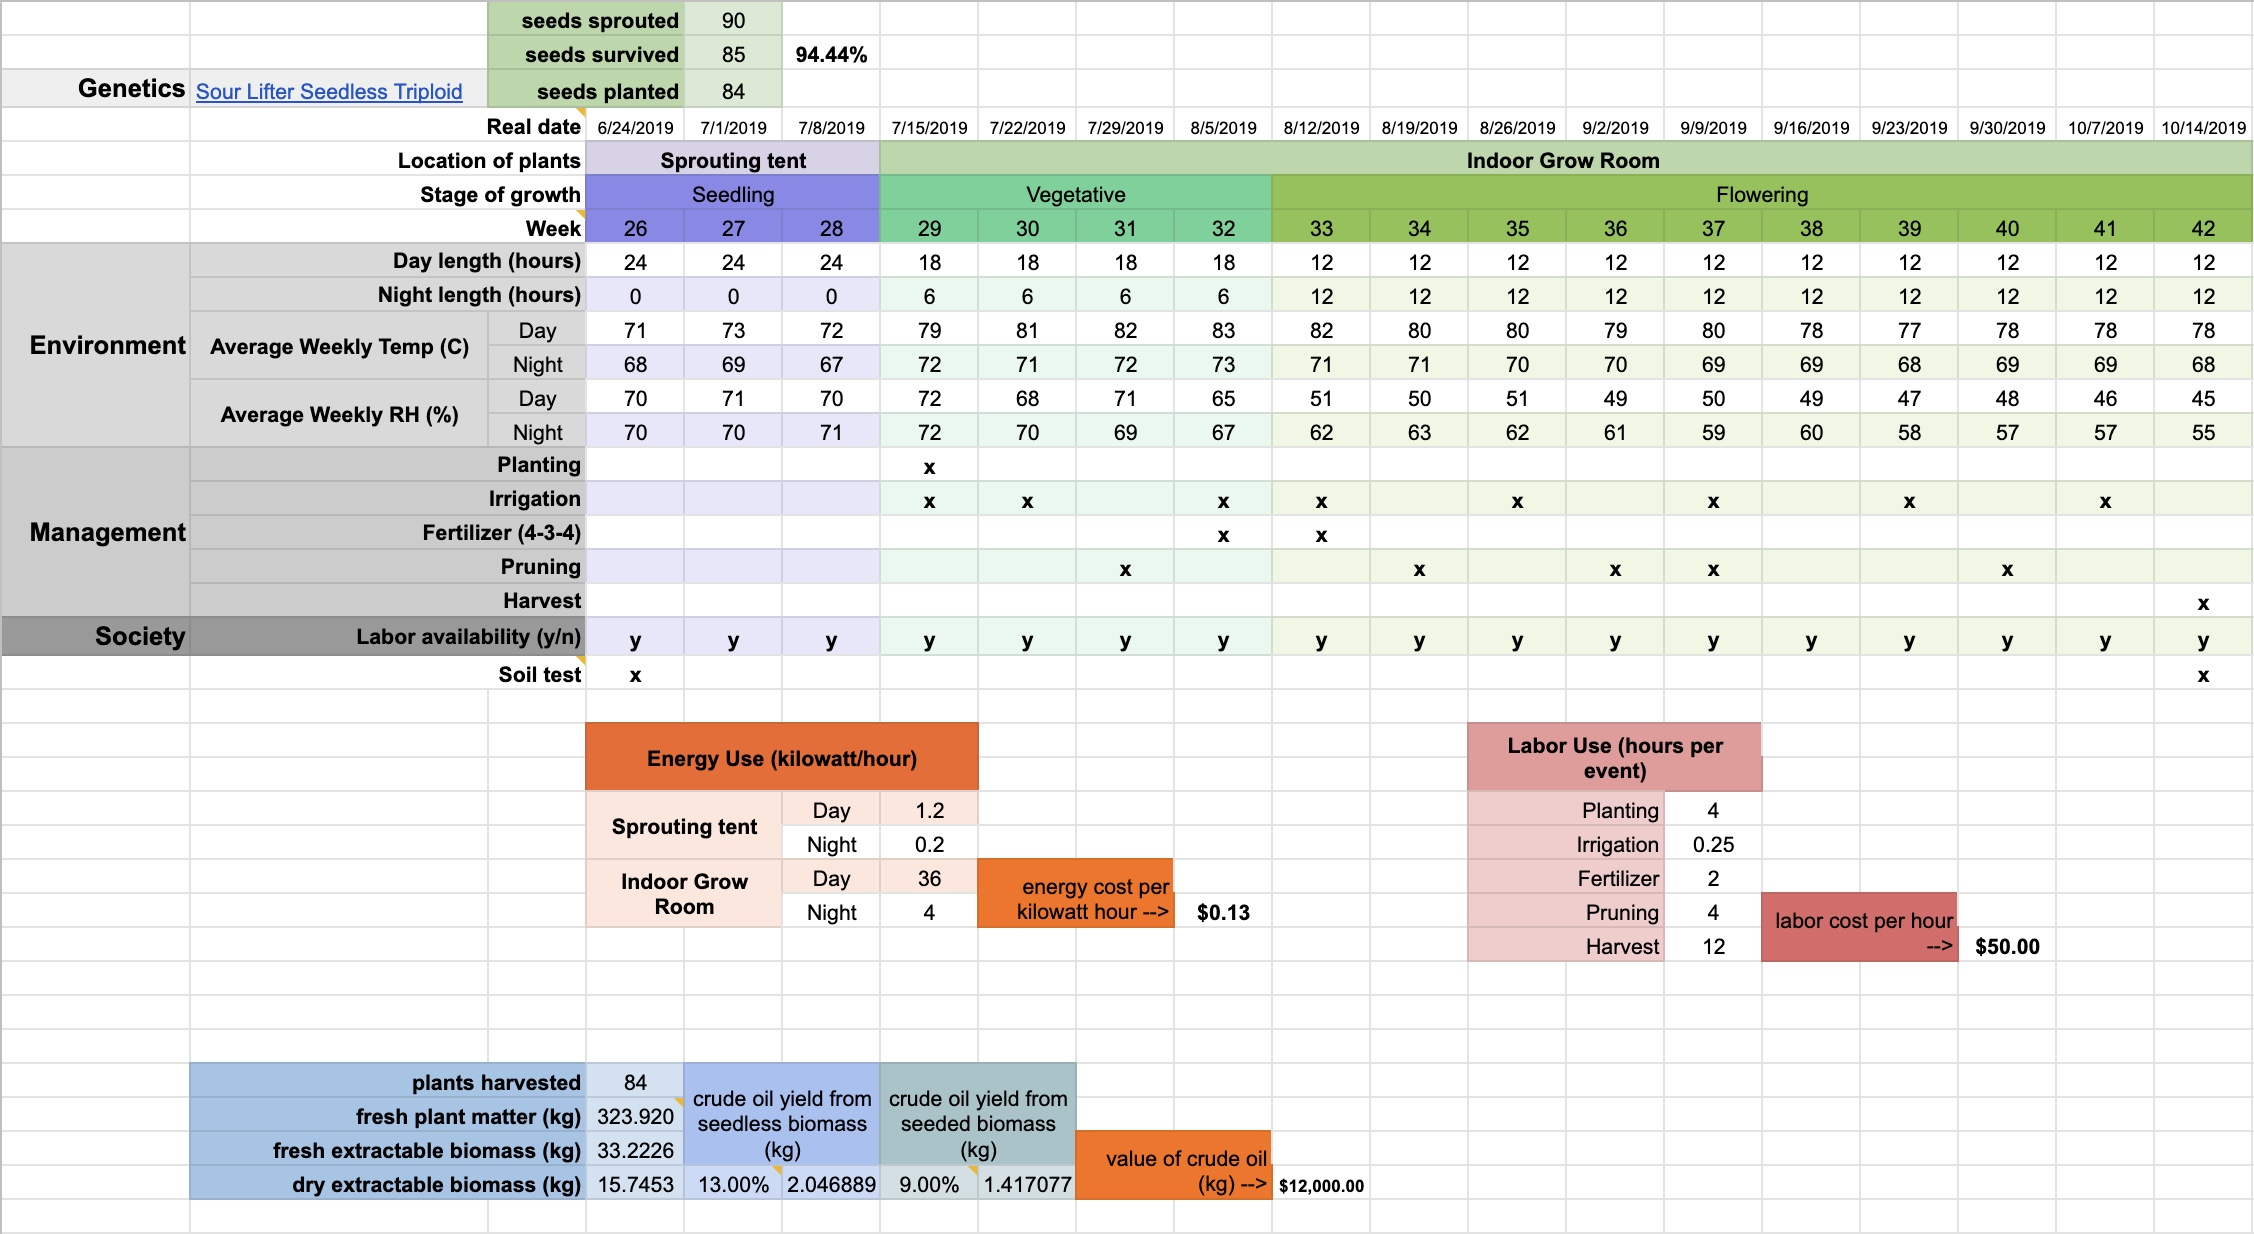

and the **soil data from before and after the cycle is here**:
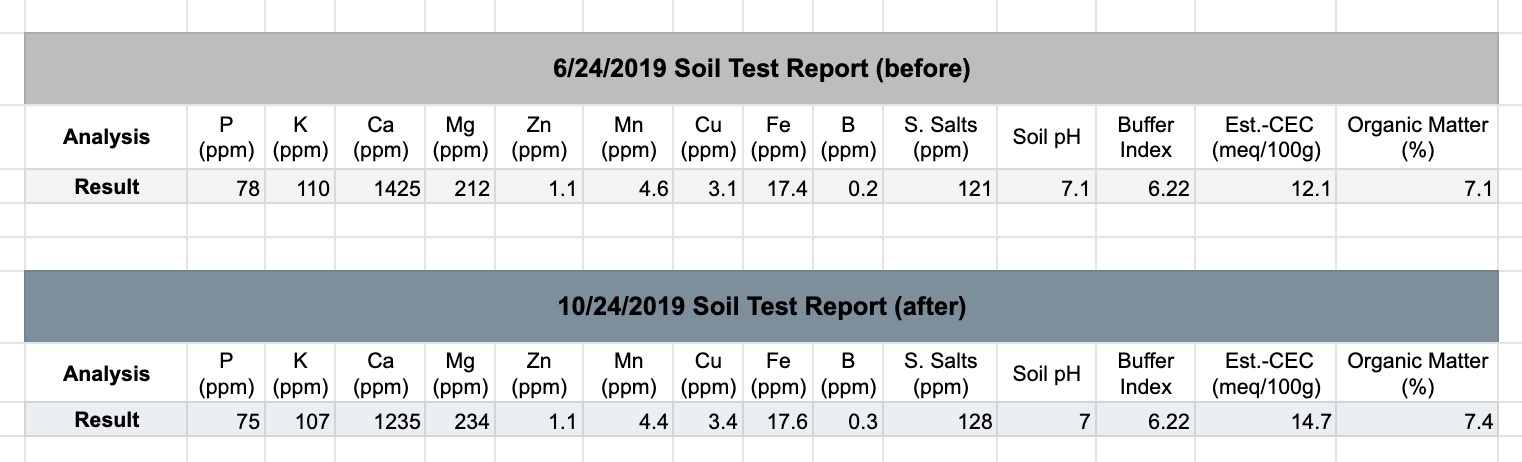

Typically, real farm data won't be curated to this extent. Building tools to ingest raw data and, in an automated way, produce curated datasets is one the ongoing challenges available to the GaiaHub community.


**Note**: 
* the Seedling growth stage is ignored in this notebook
* the environmental data is given in weekly averages, which is because the Digital Gaia engine handles data at the frequency of 1 week

## 3. How we built a model of a real indoor hemp farm
## 3.1. Break down the problem
In order to build a digital twin of the Roots & Culture indoor hemp farm, specifically Indoor Grow Room 1, we need to first think about what elements will exist in this model. It can deciding how to build a model it can be helpful to think about what aspects of the environment are changing through time, which outcomes are important, and the cropping system in question.

Once you have a list of elements to include, it can be helpful to imagine how these elements relate to one another. To achieve this we suggest building a model map.

## 3.2. Build a model map
A model map is a visual representation of model elements and how they relate to each other in the most general sense. 

The following is the model map we built to describe the Roots & Culture indoor farm:
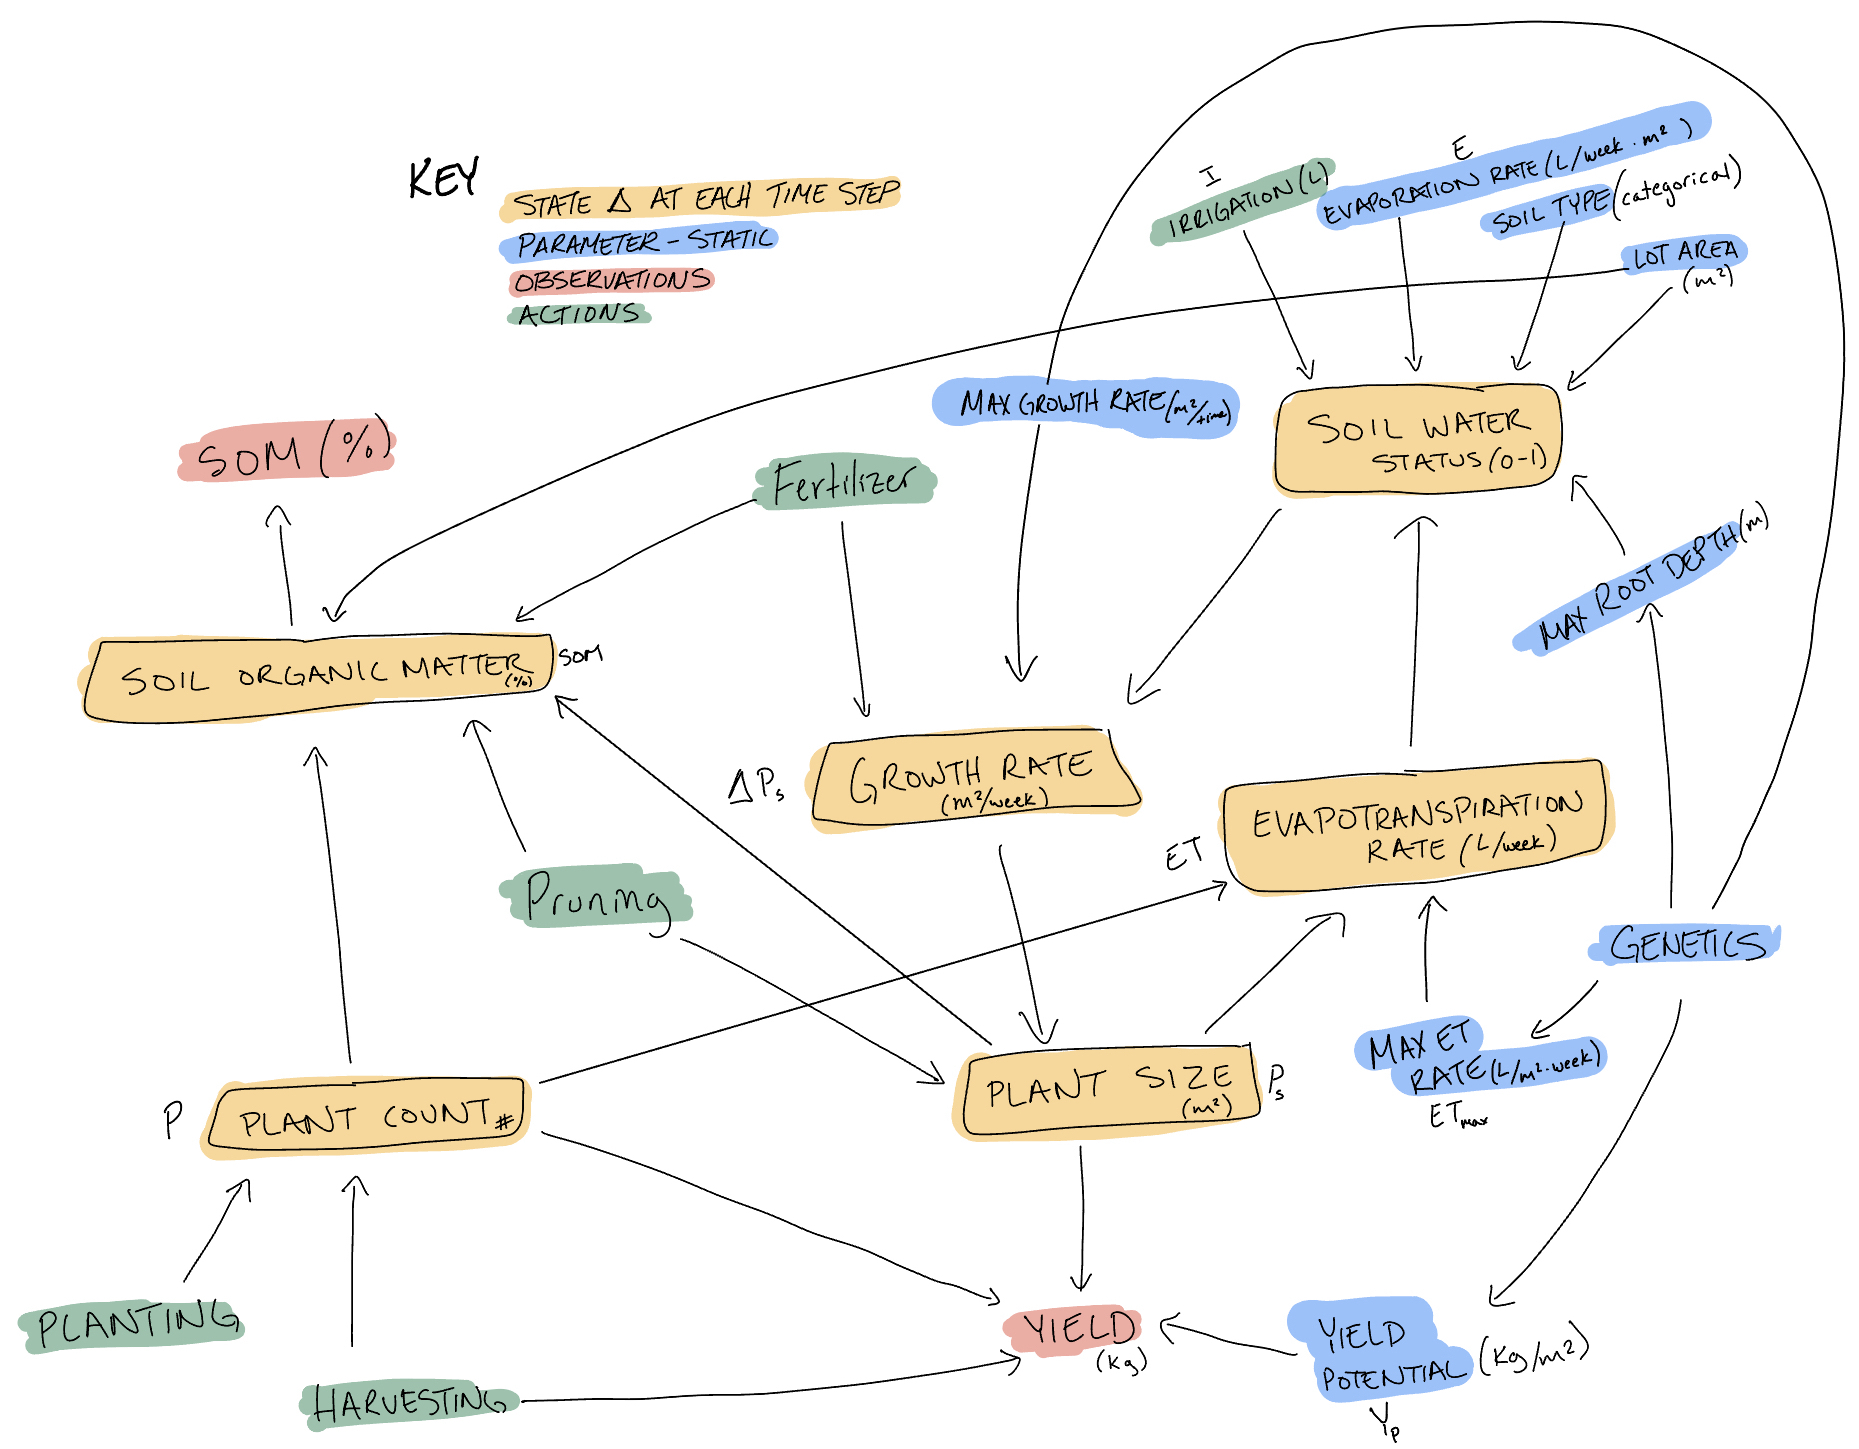


Pay close attention to the **arrows with directions** connecting each element on the map--these indicate the direction of the interaction between elements. For example, PLANTING has an effect on PLANT COUNT, and not the other way around.

Note how elements have been grouped into four categories:
1. **State**: this is something that changes at each time step, and may or may not depend on its value in the previous step
2. **Parameter**: this is a constant value that is a trait of (some part of) the system
3. **Observation**: this is a measurement that can be extracted from (some part of) the system
4. **Action**: this is a concept which has an effect on (some part of) the system

Also, for those of who know please forgive our use of the formal *Soil Water Status* moniker to refer to a unique resistance scale that has been defined for *this model only*.

## 3.3. Describe how states evolve at each time step
Once a model map is built it is almost time to start coding, but first it can be helpful to make sure the model you are trying to build is well defined. With the model map and element categorization, we have only a shallow understanding of *how* elements relate to each other. That is, what is their mathematical relationship? Before jumping right into code, we write pseudo-code just to get our ideas into extra-brain territory quickly.

In the example below, we are describing how the State concept called Plant Size changes through time. In the model map above there are two arrows pointing at Plant Size, that is the Action concept called Pruning and the State concept called Growth Rate. This means our model for Plant Size needs to include these terms.
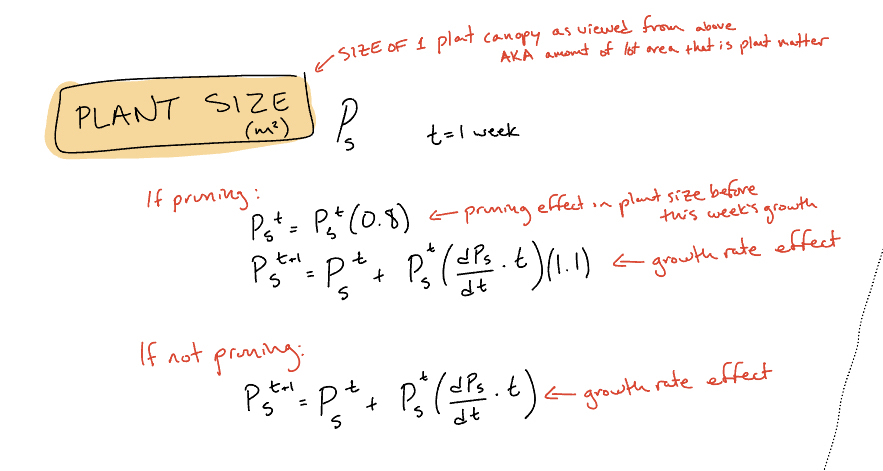
In the pseudo-code above Plant Size at time `t+1` is described as a function of Plant Size at time `t` and Growth Rate. Also, two similar formulas for Plant Size at time `t+1` are given, one for when Pruning is done during the previous week and one for when no Pruning has been done.

Similar pseudo-code was written to describe how all the other States change over time. Using this pseudo code we can quickly build a custom agent file.

## 3.4. Build configuration file and agent
Now just follow the [instructions in the Get Started notebook](https://github.com/gaia-os/gaia-hub/blob/main/notebooks/get_started.ipynb) for building configuration files and agents.

The agent can become difficult. We recommend using the [`roots_agent.py`](https://github.com/gaia-os/fangorn/blob/main/digital_gaia/fangorn/agents/impl/roots_agent.py) file as an example of one way to implement the above model map in the Digital Gaia engine.

An example of including **provenance** is given in the [`roots_agent.py`](https://github.com/gaia-os/fangorn/blob/main/digital_gaia/fangorn/agents/impl/roots_agent.py) file in the definitions of `def get_wilting_point()` and ` def get_saturation_point()`:
```python
    @staticmethod
    def get_wilting_point():
        """
        Getter
        :return: a dictionary whose keys are soil types and values are the associated wilting point
        """
        # Schwankl, L.J. and T. Prichard. 2009. University of California Drought Management Web Site. 
        # http://UCManageDrought.ucdavis.edu. Viewed Aug. 13, 2009.
        return {  # TODO check that these values are correct
            SoilType.VeryCoarseSands: 3.333,
            SoilType.CoarseSands: 6.25,
            SoilType.FineSands: 6.25,
            SoilType.LoamySands: 6.25,
            SoilType.SandyLoams: 10.416,
            SoilType.FineSandyLoams: 10.416,
            ...
```
Note the academic style citation in the comments. This is one of several acceptable example of how to add provenance to a model.

## 3.5. Visualizing predictions and performing inference

Now, we want to visualize predicted outcomes of the Roots & Culture Indoor Hemp cycle using the Digital Gaia engine.

We need to set things up properly, then we can visualize.

In [1]:
# Import required packages
import os
import sys
import matplotlib.pyplot as plt
import jax.numpy as jnp
from numpyro.optim import optax_to_numpyro
from numpyro.infer import Trace_ELBO
import optax
from numpyro import set_platform

/Users/mattjenkins/Desktop/digital-gaia/gaia-hub/DGenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Retrieve the fangorn directory (option 1)
module_path = os.path.abspath(os.path.join('../fangorn/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# # Retrieve the fangorn directory (option 2)
# import digital_gaia.fangorn as fangorn
# fangorn_dir = dirname(dirname(dirname(abspath(fangorn.__file__))))

In [3]:
# Tell numpyro whether to use cpu or gpu
use_gpu = False
if use_gpu is True:
    set_platform('gpu')
else:
    set_platform('cpu')

In [4]:
# Import required classes from the fangorn module
from digital_gaia.fangorn.agents.AgentFactory import AgentFactory
from digital_gaia.fangorn.assessment.DataLoader import DataLoader
from digital_gaia.fangorn.kernels.impl.MCMCKernel import MCMCKernel
from digital_gaia.fangorn.kernels.impl.SVIKernel import SVIKernel
from digital_gaia.fangorn.visualisation.distributions import draw_beliefs
from digital_gaia.fangorn.visualisation.distributions import compare_posteriors

In [5]:
# Load the configuration file corresponding to the Roots & Culture model
data_loader = DataLoader('../fangorn/data/projects/Roots-and-Culture/roots-indoor1.json')

In [6]:
# Load the agents agent(s) compatible with the loaded data
agents = AgentFactory.create(data_loader, verbose=True)

# Get ordinary differential equations (ODE) and stochastic differential equations (SDE) agents
ode_agent = next(filter(lambda a: a.name == "Roots-and-Culture.roots-indoor1.Deterministic", agents))

[INFO] Agents found:
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.roots_agent.RootsAndCultureAgent'>
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.get_started_agent.GetStartedAgent'>
[INFO] 
[INFO] Project interventions:
[INFO] 	- v1.management.base.agriculture.Irrigation.IrrigateCrops.Yes
[INFO] 	- v1.management.base.agriculture.Harvest.HarvestCrops.Hemp
[INFO] 	- v1.management.base.agriculture.Pruning.PruneCrops.Yes
[INFO] 	- v1.management.base.agriculture.Fertilizer.FertilizeSoil.Yes
[INFO] 	- v1.management.base.agriculture.Planting.PlantingSeeds.HempSeeds
[INFO] 
[INFO] Agents satisfying interventions:
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.roots_agent.RootsAndCultureAgent'>
[INFO] 
[INFO] Project species:
[INFO] 	- v1.genetics.base.plant.Plant.PlantSpecies.Hemp
[INFO] 
[INFO] Agents satisfying interventions and species:
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.roots_agent.RootsAndCultureAgent'>
[INFO] 


In [7]:
# Predict the future using the ODE and SDE agents
ode_prediction_samples = ode_agent.predict(model=ode_agent.model, num_samples=1)

**Visualize the predictions**

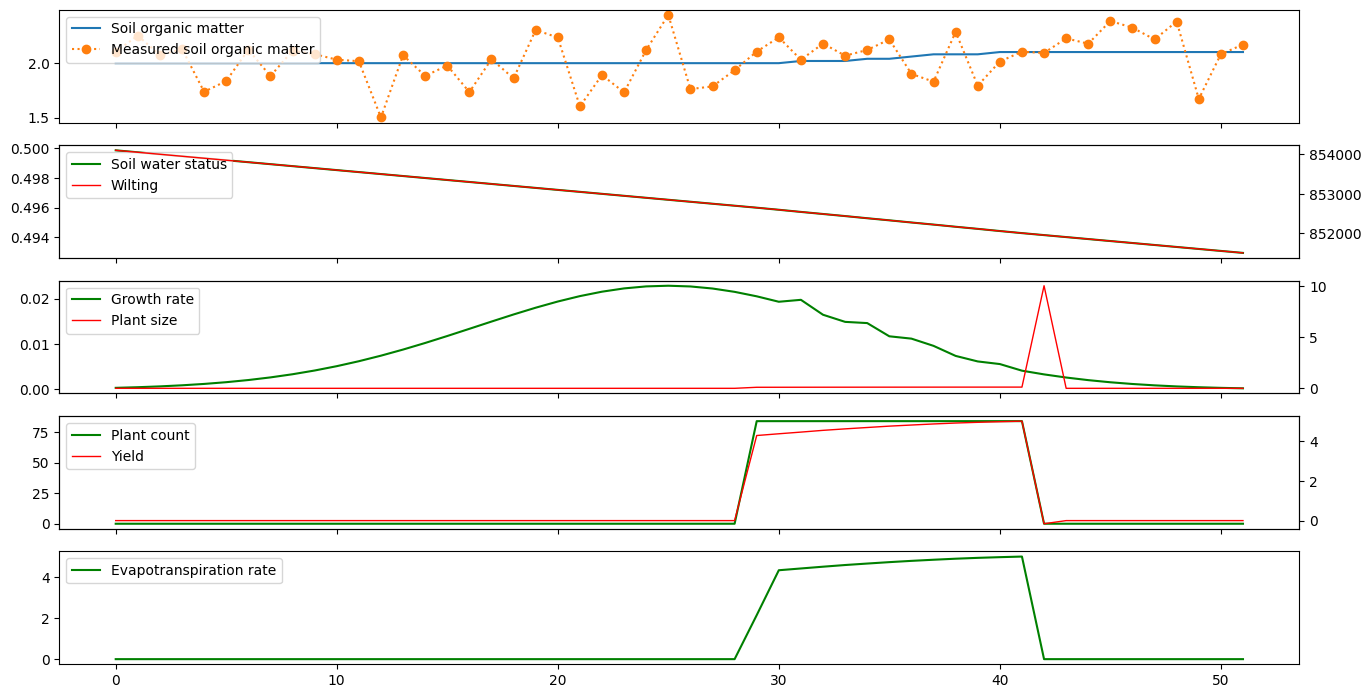

In [8]:
# Draw prior beliefs using the predictive samples
fig = draw_beliefs(
        ode_prediction_samples,
        var_1={
            "soil_organic_matter": "Soil organic matter",
            "soil_water_status": "Soil water status",
            "growth_rate": "Growth rate",
            "plant_count": "Plant count",
            "evapotranspiration_rate": "Evapotranspiration rate"
        },
        var_2={
            "obs_soil_organic_matter": "Measured soil organic matter",
            "wilting": "Wilting",
            "plant_size": "Plant size",
            "obs_yield": "Yield",
            None: None
        },
        measured=[True, False, False, False, False],
        fig_size=(16, 8.5)
    )

**Performing inference**

First, let's provide the agent with the data it should use to perform inference.

In [9]:
# Provide the data to the deterministic agent
data = {
    'obs_soil_organic_matter': ode_prediction_samples['obs_soil_organic_matter'][0]
}
cond_model, cond_guide = ode_agent.condition_all(data=data)

Second, let's create the mask specifying which observations are provided to the model:

In [10]:
# The measurement interval is the number of time steps between two observations made by the agent 
measurement_interval = 2

# Create the mask
n_measurements = len(data['obs_soil_organic_matter'])
mask = {
    'obs_soil_organic_matter': jnp.expand_dims(jnp.arange(n_measurements), -1) % measurement_interval == 0
}

Third, let's run inference using Monte Carlo Markov Chain (MCMC):

In [11]:
# Create the MCMC algorithm
mcmc_args = {
    "num_warmup": 1000,
    "num_samples": 1000, 
    "num_chains": 1
}
mcmc_algorithm = ode_agent.inference_algorithm(MCMCKernel, kernel_args=mcmc_args)

# Perform inference using MCMC
inference_args = {
    "mask": mask
}
mcmc_samples = mcmc_algorithm.run_inference(inference_args=inference_args)

sample: 100%|█| 2000/2000 [00:08<00:00, 237.30it/s, 1023 steps of size 1.93e-08.


Fourth, let's run inference using Stochastic Variational Inference (SVI):

In [12]:
# Create the SVI algorithm
svi_args = {
    "optimiser": optax_to_numpyro(optax.adabelief(1e-3, eps=1e-8, eps_root=1e-8)),
    "loss": Trace_ELBO(num_particles=10),
    "num_steps": 1000
}
svi_algorithm = ode_agent.inference_algorithm(SVIKernel, kernel_args=svi_args)

# Perform inference using SVI
inference_params = {
    "stable_update": True, 
    "mask": mask
}
svi_samples = svi_algorithm.run_inference(inference_params=inference_params)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]/Users/mattjenkins/Desktop/digital-gaia/gaia-hub/DGenv/lib/python3.11/site-packages/jax/_src/linear_util.py:165: UserWarning: Found vars in model but not guide: {'obs_yield'}
  ans = self.f(*args, **dict(self.params, **kwargs))
100%|█| 1000/1000 [00:01<00:00, 660.63it/s, init loss: -1114.8372, avg. loss [95


**Visualize the posterior beliefs**

Call the function in charge of comparing the initial predictions and the posterior distribution, i.e. MCMC and SVI posteriors.

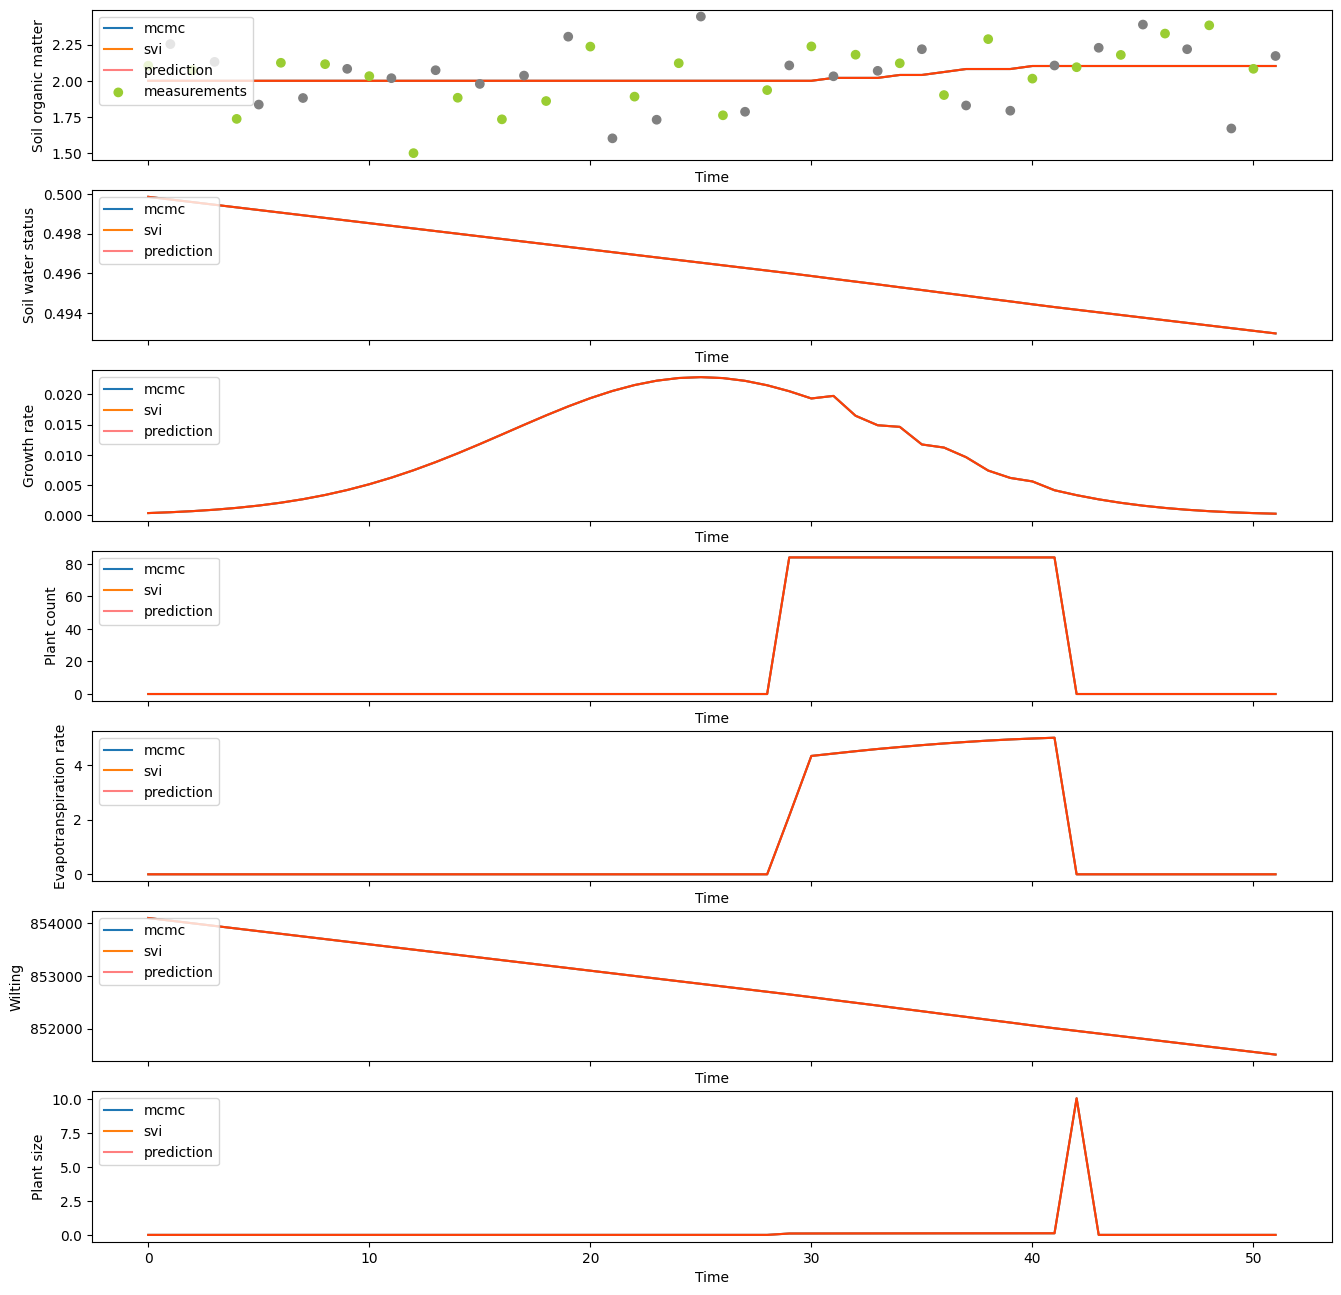

In [13]:
# Compare the initial prediction, the SVI posterior, and the MCMC posterior
fig = compare_posteriors(
    is_observed=mask['obs_soil_organic_matter'],
    mcmc_samples=mcmc_samples,
    svi_samples=svi_samples,
    prediction_samples=ode_prediction_samples,
    var_names=[
        "soil_organic_matter", "soil_water_status", "growth_rate", "plant_count",
        "evapotranspiration_rate", "wilting", "plant_size"
    ],
    var_labels=[
        "Soil organic matter", "Soil water status", "Growth rate", "Plant count",
        "Evapotranspiration rate", "Wilting", "Plant size"
    ],
    fig_size=(16, 16)
)

## 4. Experiment: Changing the model
Sometimes it might be useful to change the model of a plot or project. You might want to see how your changes are impacting the engine, or you might need to demonstrate how your changes impact the model in order to secure a bounty; whatever your reason, it can be useful to see an example of a succesful experiment before you endeavor to create your own.

## 4.1. Envisioning the change
Much like we did when originally building the model map, it can be helpful to first conceive of the desired changes in an abstract sense, then convert these ideas into code.

We want to test the effect of improving the Growth Rate calculation so that the normal curve from which Growth Rate is sampled starts when Planting occurs and not on Week 1 of the year.

## 4.2. Modifying the agent
In the [`roots_agent.py`](https://github.com/gaia-os/fangorn/blob/main/digital_gaia/fangorn/agents/impl/roots_agent.py) file there are many functions defined, but one of them `def compute_growth_rate()` deals directly with the change we have envisioned.

In the original version of this function the Growth Rate is sampled from a normal distribution:
```python
    @staticmethod
    def compute_growth_rate(
        t, soil_water_status_t1, fertiliser, growth_function_mean, growth_function_std, max_growth_rate
    ):
        """
        Compute the growth rate at time t + 1
        :param t: the time step t
        :param soil_water_status_t1: the soil water status at time t + 1
        :param fertiliser: whether some fertiliser is applied
        :param growth_function_mean: the mean of the function defining the plant growth for each time step
        :param growth_function_std: the standard deviation of the function defining the plant growth for each time step
        :param max_growth_rate: the maximum growth rate of the plant
        :return: the growth rate at time t + 1
        """

        # Compute the effect of the fertiliser on the growth rate at time t + 1
        fertiliser_effect = 1 + 0.1 * fertiliser

        # Compute the growth rate at time t + 1
        growth_rate_t1 = norm.pdf(t + 1, loc=growth_function_mean, scale=growth_function_std)
        growth_rate_t1 = growth_rate_t1 * soil_water_status_t1 * fertiliser_effect
        return deterministic('growth_rate', jnp.clip(growth_rate_t1, a_min=0, a_max=max_growth_rate))
```

In the new version of this function...

```python
 # INSERT NEW FUNCTION HERE
```

## 4.3. Visualizing impact on predictions

Once we have modifed the agent file we can make proceed.

First, abort this notebook, then immediately restart it.

Then, load libraries 

Load the modified agent and visualize prediction and inference, just like we did above. Then:

In [14]:
# Import required packages
import os
import sys
import matplotlib.pyplot as plt
import jax.numpy as jnp
from numpyro.optim import optax_to_numpyro
from numpyro.infer import Trace_ELBO
import optax
from numpyro import set_platform

# Retrieve the fangorn directory (option 1)
module_path = os.path.abspath(os.path.join('../fangorn/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# # Retrieve the fangorn directory (option 2)
# import digital_gaia.fangorn as fangorn
# fangorn_dir = dirname(dirname(dirname(abspath(fangorn.__file__))))

# Tell numpyro whether to use cpu or gpu
use_gpu = False
if use_gpu is True:
    set_platform('gpu')
else:
    set_platform('cpu')
    
# Import required classes from the fangorn module
from digital_gaia.fangorn.agents.AgentFactory import AgentFactory
from digital_gaia.fangorn.assessment.DataLoader import DataLoader
from digital_gaia.fangorn.kernels.impl.MCMCKernel import MCMCKernel
from digital_gaia.fangorn.kernels.impl.SVIKernel import SVIKernel
from digital_gaia.fangorn.visualisation.distributions import draw_beliefs
from digital_gaia.fangorn.visualisation.distributions import compare_posteriors

In [15]:
# Load the configuration file corresponding to the Roots & Culture model
data_loader = DataLoader('../fangorn/data/projects/Roots-and-Culture/roots-indoor1.json')

# Load the agents agent(s) compatible with the loaded data
agents = AgentFactory.create(data_loader, verbose=True)

# Get ordinary differential equations (ODE) and stochastic differential equations (SDE) agents
ode_agent = next(filter(lambda a: a.name == "Roots-and-Culture.roots-indoor1.Deterministic", agents))

[INFO] Agents found:
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.roots_agent.RootsAndCultureAgent'>
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.get_started_agent.GetStartedAgent'>
[INFO] 
[INFO] Project interventions:
[INFO] 	- v1.management.base.agriculture.Irrigation.IrrigateCrops.Yes
[INFO] 	- v1.management.base.agriculture.Harvest.HarvestCrops.Hemp
[INFO] 	- v1.management.base.agriculture.Pruning.PruneCrops.Yes
[INFO] 	- v1.management.base.agriculture.Fertilizer.FertilizeSoil.Yes
[INFO] 	- v1.management.base.agriculture.Planting.PlantingSeeds.HempSeeds
[INFO] 
[INFO] Agents satisfying interventions:
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.roots_agent.RootsAndCultureAgent'>
[INFO] 
[INFO] Project species:
[INFO] 	- v1.genetics.base.plant.Plant.PlantSpecies.Hemp
[INFO] 
[INFO] Agents satisfying interventions and species:
[INFO] 	- <class 'digital_gaia.fangorn.agents.impl.roots_agent.RootsAndCultureAgent'>
[INFO] 


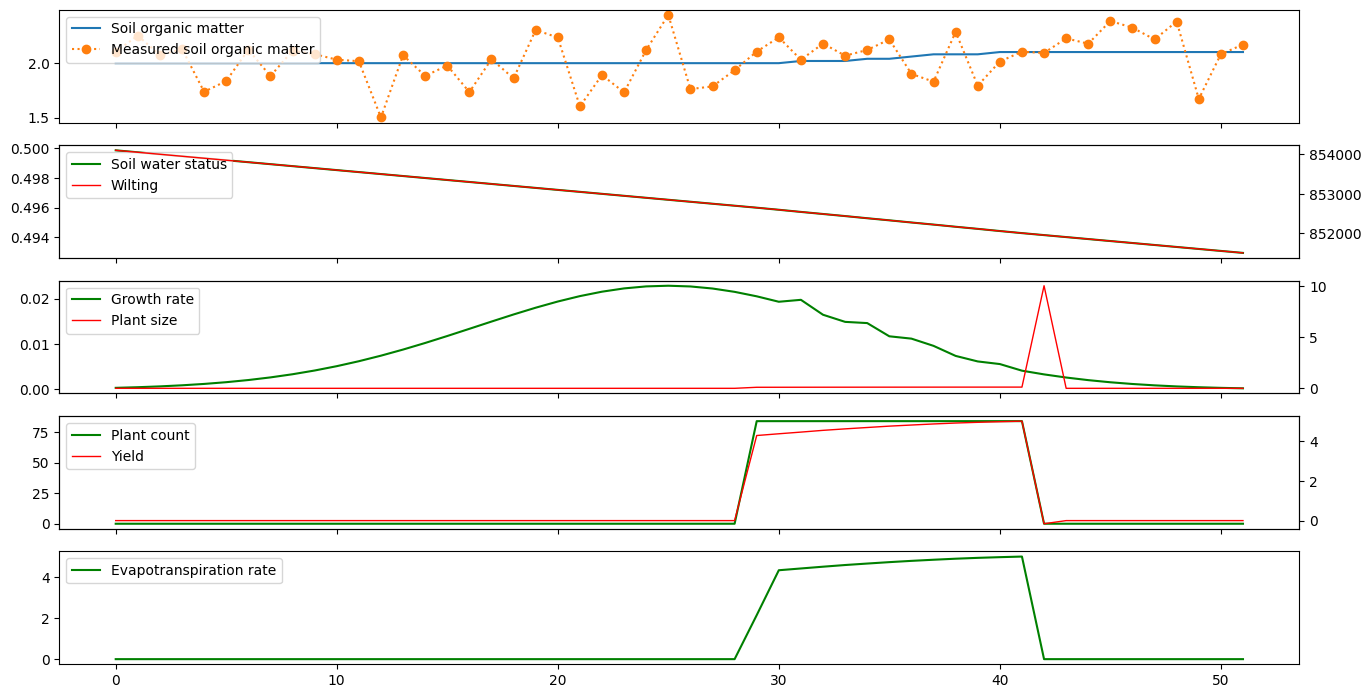

In [16]:
# Predict the future using the ODE and SDE agents
ode_prediction_samples = ode_agent.predict(model=ode_agent.model, num_samples=1)

# Draw prior beliefs using the predictive samples
fig = draw_beliefs(
        ode_prediction_samples,
        var_1={
            "soil_organic_matter": "Soil organic matter",
            "soil_water_status": "Soil water status",
            "growth_rate": "Growth rate",
            "plant_count": "Plant count",
            "evapotranspiration_rate": "Evapotranspiration rate"
        },
        var_2={
            "obs_soil_organic_matter": "Measured soil organic matter",
            "wilting": "Wilting",
            "plant_size": "Plant size",
            "obs_yield": "Yield",
            None: None
        },
        measured=[True, False, False, False, False],
        fig_size=(16, 8.5)
    )

Visually comparing the two, we can see that shifting the Growth Rate curve clearly improved predictions.